In [ ]:
import sys
# add parent directory and its parent to sys.path so that python finds the modules
sys.path.append('..')
sys.path.append('../..')

from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression

from cluster_utils import return_cluster_results_and_plot_path, return_cluster_results_and_plot_path_grouped, get_rect_to_rect_data

In [ ]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

In [ ]:
# use data until ..
end_date_str = '2023-01-01 00:00:00'
end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S')

In [ ]:
# add information of an intersection using OSM tile calculator (https://tools.geofabrik.de/calc/)
# if paths use passanger crossing, it is possible to exlucde rides that cross a given square (exlude_coords)
# input and output lanes are extracted from google maps' satellite data (http://maps.google.com/)
  
intersections = [


    # Alexanderstr./Karl-Marx-Allee/Ottobraun-Str.
    {
        "intersection number": 1,
        "name": "Alexanderstr./Karl-Marx-Allee/Ottobraun-Str.",
        "direction": "north to east",
        "start_rect_coords": (13.416448,52.522311,13.416889,52.522671),
        "end_rect_coords":   (13.416743,52.521404,13.417205,52.521852),
        "exclude_coords": (13.41676,52.521923,13.418021,52.522443),
        "lanes in": 3,
        "lanes out": 2
    },
    {
        "intersection number": 1,
        "name": "Alexanderstr./Karl-Marx-Allee/Ottobraun-Str.",
        "direction": 'east to south',
        "start_rect_coords": (13.41673,52.5219,13.417469,52.522088),
        "end_rect_coords": (13.416021,52.521813,13.416321,52.52203),
        "exclude_coords": (13.416364,52.521767,13.416761,52.521984),
        "lanes in": 5,
        "lanes out": 3 
    },
    {
        "intersection number": 1,
        "name": "Alexanderstr./Karl-Marx-Allee/Ottobraun-Str.",
        "direction": 'south to west',
        "start_rect_coords": (13.416169,52.521508,13.416513,52.521832),
        "end_rect_coords": (13.41591,52.522275,13.416421,52.522569),
        "exclude_coords": (13.415467,52.521919,13.416219,52.522107),
        "lanes in": 5,
        "lanes out": 3 
    },
    {
        "intersection number": 1,
        "name": "Alexanderstr./Karl-Marx-Allee/Ottobraun-Str.",
        "direction": 'west to north',
        "start_rect_coords": (13.415638,52.522086,13.415982,52.522299),
        "end_rect_coords": (13.41685,52.52219,13.417194,52.522403),
        "exclude_coords": (13.416228,52.522279,13.416572,52.522492),
        "lanes in": 4,
        "lanes out": 2
    },
    # 'Leibnizstr./Bismarckstr.'
    {
        "intersection number": 2,
        "name": "Leibnizstr./Bismarckstr.",
        "direction": "north to east",
        "start_rect_coords": (13.314892,52.511974,13.315527,52.512162),
        "end_rect_coords": (13.31457,52.512248,13.314861,52.512583),
        "lanes in": 3,
        "lanes out": 5
    },
    {
        "intersection number": 2,
        "name": "Leibnizstr./Bismarckstr.",
        "direction": "east to south",
        "start_rect_coords": (13.314913,52.512157,13.315644,52.512375),
        "end_rect_coords": (13.314462,52.511618,13.314807,52.512022),
        "exclude_coords": (13.314929,52.511981,13.315317,52.512189),
        "lanes in": 5,
        "lanes out": 2
    },
    {
        "intersection number": 2,
        "name": "Leibnizstr./Bismarckstr.",
        "direction": "south to west",
        "start_rect_coords": (13.314699,52.51167,13.31498,52.512028),
        "end_rect_coords": (13.314082,52.512114,13.314669,52.512289),
        "lanes in": 3,
        "lanes out": 4
    },
    {
        "intersection number": 2,
        "name": "Leibnizstr./Bismarckstr.",
        "direction": "west to north",
        "start_rect_coords": (13.314023,52.511924,13.314636,52.512129),
        "end_rect_coords": (13.314715,52.512248,13.315043,52.512619),
        "lanes in": 5,
        "lanes out": 2
    },
    # 'Mehringdamm/Gneisenaustr./Yorckstr.'
    {
        "intersection number": 3,
        "name": "Mehringdamm/Gneisenaustr./Yorckstr.",
        "direction": "north to east",
        "start_rect_coords": (13.387586,52.493157,13.387898,52.493592),
        "end_rect_coords": (13.38801,52.492482,13.388858,52.492737),
        "exclude_coords": (13.387999,52.492964,13.388343,52.493187),
        "lanes in": 4,
        "lanes out": 3
    },
    {
        "intersection number": 3,
        "name": "Mehringdamm/Gneisenaustr./Yorckstr.",
        "direction": "east to south",
        "start_rect_coords": (13.388242,52.492848,13.388361,52.493139),
        "end_rect_coords": (13.387137,52.492717,13.387659,52.492805),
        "exclude_coords": (13.387752,52.492474,13.388096,52.492697),
        "lanes in": 4,
        "lanes out": 3
    },
    {
        "intersection number": 3,
        "name": "Mehringdamm/Gneisenaustr./Yorckstr.",
        "direction": "south to west",
        "start_rect_coords": (13.387469,52.492345,13.387899,52.492652),
        "end_rect_coords": (13.387001,52.493046,13.387592,52.4933),
        "exclude_coords": (13.387103,52.492634,13.387447,52.492857),
        "lanes in": 4,
        "lanes out": 3
    },
    {
        "intersection number": 3,
        "name": "Mehringdamm/Gneisenaustr./Yorckstr.",
        "direction": "west to north",
        "start_rect_coords": (13.38668,52.492775,13.387303,52.493003),
        "end_rect_coords": (13.387999,52.493079,13.388305,52.493431),
        "exclude_coords": (13.387366,52.493039,13.387785,52.493347),
        "lanes in": 4,
        "lanes out": 3
    },
     # 'Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee'
    {
        "intersection number": 4,
        "name": "Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee",
        "direction": "north to east",
        "start_rect_coords": (13.453274,52.516103,13.45385,52.516485),
        "end_rect_coords": (13.454497,52.515534,13.455293,52.515691),
        "exclude_coords": (13.454095,52.515812,13.454569,52.516028),
        "lanes in": 4,
        "lanes out": 3
    },
    {
        "intersection number": 4,
        "name": "Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee",
        "direction": "east to south",
        "start_rect_coords": (13.454486,52.515753,13.455282,52.51591),
        "end_rect_coords": (13.453429,52.515179,13.453849,52.515643),
        "exclude_coords": (13.454154,52.515476,13.454628,52.515692),
        "lanes in": 5,
        "lanes out": 2
    },
    {
        "intersection number": 4,
        "name": "Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee",
        "direction": "south to west",
        "start_rect_coords": (13.454073,52.515495,13.454289,52.51564),
        "end_rect_coords": (13.453616,52.515832,13.453918,52.515993),
        "lanes in": 3,
        "lanes out": 3
    },
    {
        "intersection number": 4,
        "name": "Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee",
        "direction": "west to north",
        "start_rect_coords": (13.453209,52.515697,13.453629,52.515865),
        "end_rect_coords": (13.453981,52.515955,13.454401,52.516123),
        "lanes in": 4,
        "lanes out": 2
    },
    # 'Potsdamer Str./Goebenstr./Pallasstr.'
    {
        "intersection number": 5,
        "name": "Potsdamer Str./Goebenstr./Pallasstr.",
        "direction": "north to east",
        "start_rect_coords": (13.360731,52.494571,13.361093,52.494912),
        "end_rect_coords": (13.361284,52.494088,13.361861,52.494275),
        "lanes in": 3,
        "lanes out": 3
    },
    {
        "intersection number": 5,
        "name": "Potsdamer Str./Goebenstr./Pallasstr.",
        "direction": "east to south",
        "start_rect_coords": (13.361359,52.494297,13.361936,52.494484),
        "end_rect_coords": (13.360619,52.49371,13.36104,52.494106),
        "lanes in": 3,
        "lanes out": 3
    },
    {
        "intersection number": 5,
        "name": "Potsdamer Str./Goebenstr./Pallasstr.",
        "direction": "south to west",
        "start_rect_coords": (13.360984,52.4937,13.361405,52.494096),
        "end_rect_coords": (13.360276,52.494376,13.360906,52.494609),
        "lanes in": 3,
        "lanes out": 2
    },
    {
        "intersection number": 5,
        "name": "Potsdamer Str./Goebenstr./Pallasstr.",
        "direction": "west to north",
        "start_rect_coords": (13.360228,52.494141,13.360858,52.494374),
        "end_rect_coords": (13.361081,52.49453,13.361529,52.494949),
        "lanes in": 2,
        "lanes out": 2
    },
    # 'Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr.'
    {
        "intersection number": 6,
        "name": "Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr.",
        "direction": "north to east",
        "start_rect_coords": (13.446738,52.502935,13.447095,52.503201),
        "end_rect_coords": (13.44714,52.502334,13.447626,52.502544),
        "lanes in": 4,
        "lanes out": 2
    },
    {
        "intersection number": 6,
        "name": "Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr.",
        "direction": "east to south",
        "start_rect_coords": (13.447414,52.502533,13.4479,52.502743), 
        "end_rect_coords": (13.445976,52.502347,13.446457,52.502619),
        "exclude_coords": (13.446695,52.502422,13.446966,52.502655),
        "lanes in": 4,
        "lanes out": 2
    },
    {
        "intersection number": 6,
        "name": "Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr.",
        "direction": "south to west",
        "start_rect_coords": (13.446502,52.502252,13.446983,52.502524),
        "end_rect_coords": (13.446282,52.50285,13.446704,52.50307),
        "lanes in": 3,
        "lanes out": 2
    },
    {
        "intersection number": 6,
        "name": "Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr.",
        "direction": "west to north",
        "start_rect_coords": (13.445933,52.502634,13.446355,52.502854),
        "end_rect_coords": (13.447006,52.502761,13.447262,52.502936),
        "lanes in": 4,
        "lanes out": 2
    },
    # 'Nuremberg: Further str./Maximilianstr'
    {
        "intersection number": 7,
        "name": "Nuremberg: Further str./Maximilianstr",
        "direction": "north to east",
        "start_rect_coords": (11.041171,49.45592,11.04202,49.456559),
        "end_rect_coords": (11.041654,49.455073,11.042503,49.455712),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 7,
        "name": "Nuremberg: Further str./Maximilianstr",
        "direction": "east to south",
        "start_rect_coords": (11.041654,49.455073,11.042503,49.455712), 
        "end_rect_coords": (11.040345,49.454829,11.041194,49.455468),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 7,
        "name": "Nuremberg: Further str./Maximilianstr",
        "direction": "south to west",
        "start_rect_coords": (11.040345,49.454829,11.041194,49.455468),
        "end_rect_coords": (11.040007,49.45561,11.040856,49.456249),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 7,
        "name": "Nuremberg: Further str./Maximilianstr",
        "direction": "west to north",
        "start_rect_coords": (11.040007,49.45561,11.040856,49.456249),
        "end_rect_coords": (11.041171,49.45592,11.04202,49.456559),
        "lanes in": 0,
        "lanes out": 0
    },
    # 'Nuremberg: Schnieglinger str./Nordwestring'
    {
        "intersection number": 8,
        "name": "Nuremberg: Schnieglinger str./Nordwestring",
        "direction": "north to east",
        "start_rect_coords": (11.051589,49.463469,11.052438,49.464108),
        "end_rect_coords": (11.05169,49.462653,11.052539,49.463292),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 8,
        "name": "Nuremberg: Schnieglinger str./Nordwestring",
        "direction": "east to south",
        "start_rect_coords": (11.05169,49.462653,11.052539,49.463292), 
        "end_rect_coords": (11.05036,49.462531,11.051209,49.46317),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 8,
        "name": "Nuremberg: Schnieglinger str./Nordwestring",
        "direction": "south to west",
        "start_rect_coords": (11.05036,49.462531,11.051209,49.46317),
        "end_rect_coords": (11.050194,49.463288,11.051043,49.463927),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 8,
        "name": "Nuremberg: Schnieglinger str./Nordwestring",
        "direction": "west to north",
        "start_rect_coords": (11.050194,49.463288,11.051043,49.463927),
        "end_rect_coords": (11.051589,49.463469,11.052438,49.464108),
        "lanes in": 0,
        "lanes out": 0
    },
    # 'Nuremberg: Von-Der-Tann-Str str./Wallensteinstr'
    {
        "intersection number": 9,
        "name": "Nuremberg: Von-Der-Tann-Str str./Wallensteinstr",
        "direction": "north to east",
        "start_rect_coords": (11.035543,49.439319,11.036446,49.439954),
        "end_rect_coords": (11.036739,49.438956,11.037642,49.439591),
        "exclude_coords": (11.036209,49.439741,11.040378,49.441063),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 9,
        "name": "Nuremberg: Von-Der-Tann-Str str./Wallensteinstr",
        "direction": "east to south",
        "start_rect_coords": (11.036739,49.438956,11.037642,49.439591), 
        "end_rect_coords": (11.036262,49.438196,11.037165,49.438831),
        "exclude_coords": (11.0371,49.437913,11.038684,49.439242),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 9,
        "name": "Nuremberg: Von-Der-Tann-Str str./Wallensteinstr",
        "direction": "south to west",
        "start_rect_coords": (11.036262,49.438196,11.037165,49.438831),
        "end_rect_coords": (11.03484,49.438538,11.035743,49.439173),
        "exclude_coords": (11.034842,49.437323,11.036426,49.438652),
        "lanes in": 0,
        "lanes out": 0
    },
    {
        "intersection number": 9,
        "name": "Nuremberg: Von-Der-Tann-Str str./Wallensteinstr",
        "direction": "west to north",
        "start_rect_coords": (11.03484,49.438538,11.035743,49.439173),
        "end_rect_coords": (11.035543,49.439319,11.036446,49.439954),
        "exclude_coords": (11.034198,49.438994,11.035782,49.440323),
        "lanes in": 0,
        "lanes out": 0
    },
    # Kantstr -> Schlüterstr. angucken von Westen kommend nach Nord

    # Kantstr./Schlüterstr.
    {
        "intersection number": 10,
        "name": "Kantstr./Schlüterstr.",
        "direction": "west to north",
        "start_rect_coords": (13.316677,52.505889,13.31738,52.5061),
        "end_rect_coords":   (13.31724,52.506268,13.317943,52.506786),
        "exclude_coords": (13.316725,52.506144,13.317428,52.506662),
        "lanes in": 3,
        "lanes out": 1
    },

]

In [ ]:
df = pd.DataFrame(intersections)

In [ ]:
df.columns

In [ ]:
df.reindex(columns = df.columns.tolist() + ['exlude_coords','rides','fraction_cluster_1','cluster_1_is_direct_turn','no_direct_present','fraction_direct_turn']);


In [ ]:
# df
df.columns

start coords: (11.035543, 49.439319, 11.036446, 49.439954) 
end coords: (11.036739, 49.438956, 11.037642, 49.439591)
Number of rows: 1028
Number of rides: 39


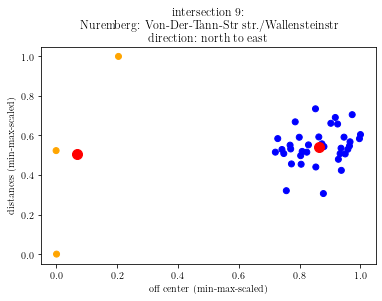

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


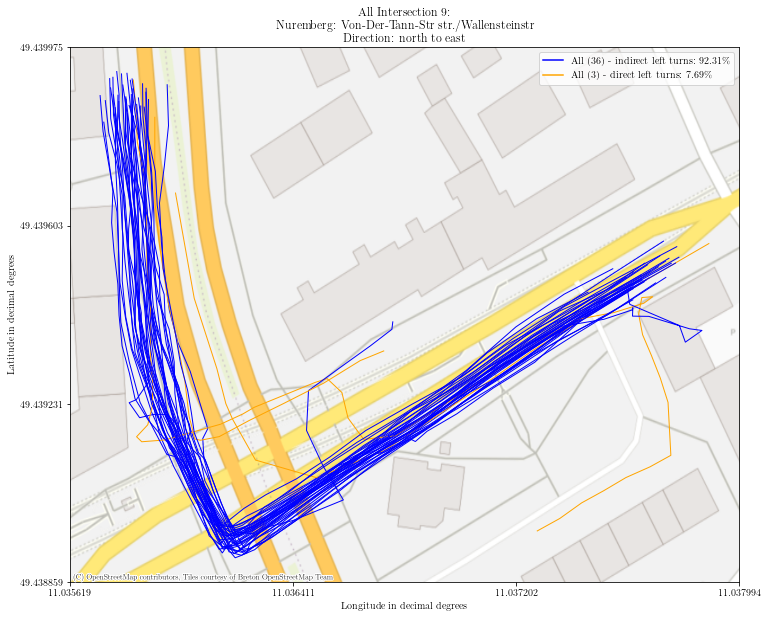



start coords: (11.036739, 49.438956, 11.037642, 49.439591) 
end coords: (11.036262, 49.438196, 11.037165, 49.438831)
Number of rows: 77
Number of rides: 4


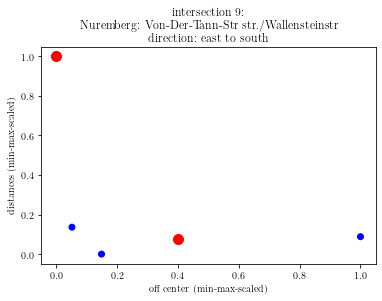

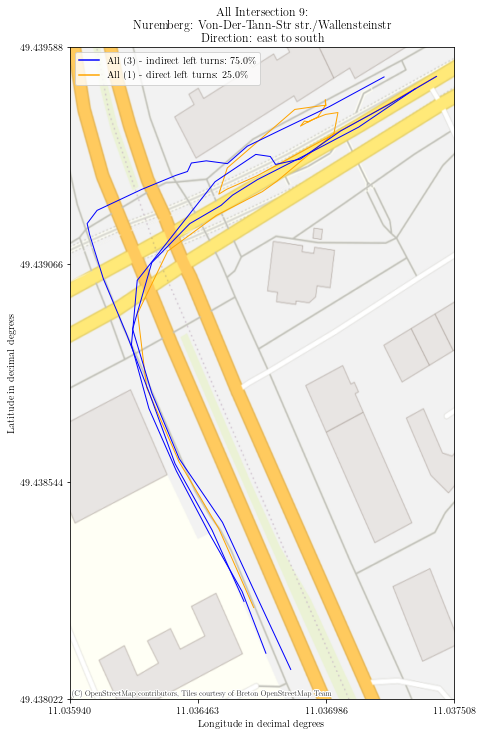



start coords: (11.036262, 49.438196, 11.037165, 49.438831) 
end coords: (11.03484, 49.438538, 11.035743, 49.439173)
Number of rows: 289
Number of rides: 11


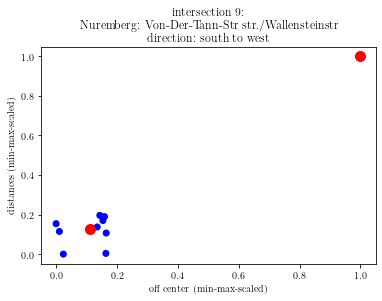

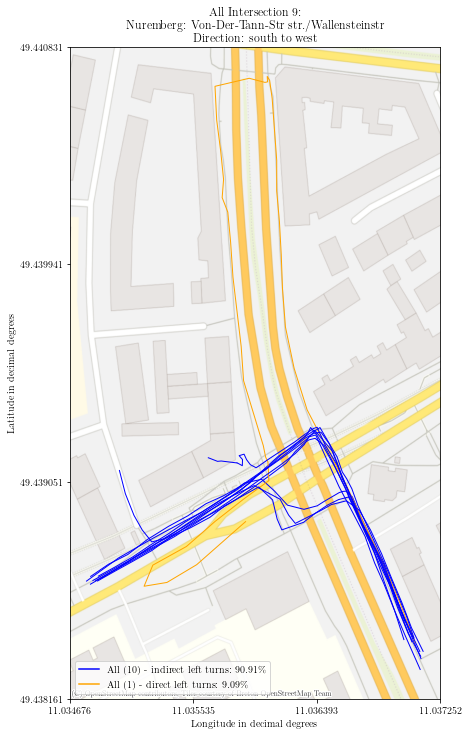



start coords: (11.03484, 49.438538, 11.035743, 49.439173) 
end coords: (11.035543, 49.439319, 11.036446, 49.439954)
Number of rows: 126
Number of rides: 9


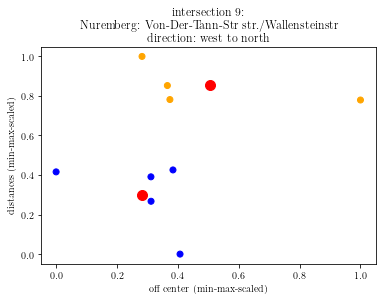

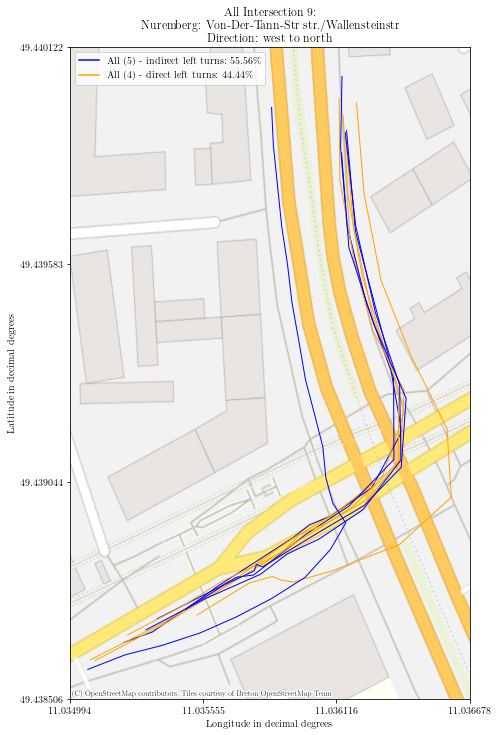



start coords: (13.316677, 52.505889, 13.31738, 52.5061) 
end coords: (13.31724, 52.506268, 13.317943, 52.506786)
Number of rows: 296
Number of rides: 31


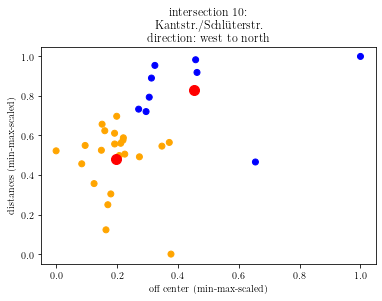

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


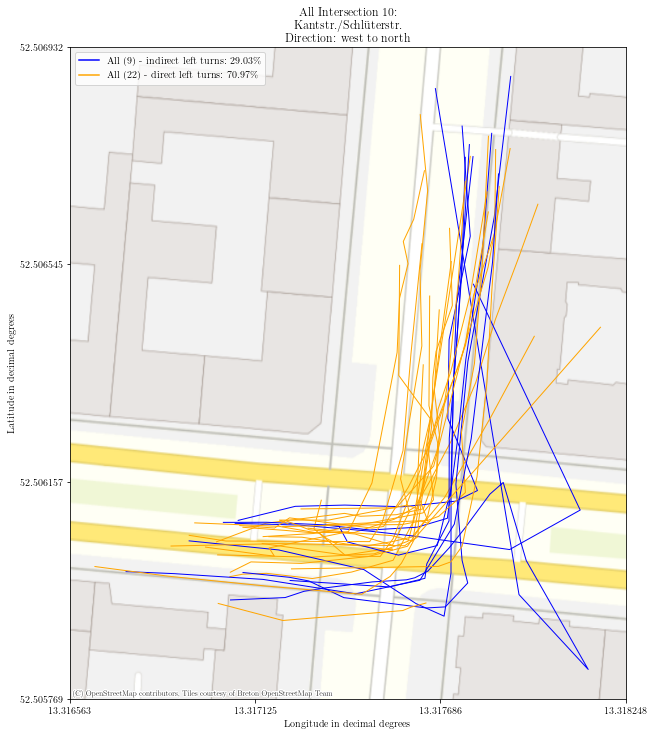

In [11]:
for idx, row in df.iloc[32:37,].iterrows():
# for idx, row in df.iterrows():
    print(f'start coords: {row.start_rect_coords} \nend coords: {row.end_rect_coords}')
    # print(row)
    #df.loc[idx,'fraction_cluster_1'], df.loc[idx,'rides'] = return_cluster_results_and_plot_path(row, figsize_rides = (12,12))
    return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group_name = "All")          #37.81, 62.19
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 0, group_name = "Group_0")#0, 100
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 1, group_name = "Group_1")#13.73, 86.27
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 2, group_name = "Group_2")#60.53, 39.47
    print('\n')

start coords: (13.387586, 52.493157, 13.387898, 52.493592) 
end coords: (13.38801, 52.492482, 13.388858, 52.492737)


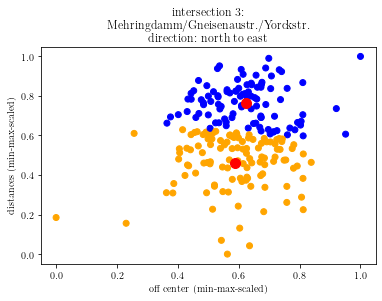

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


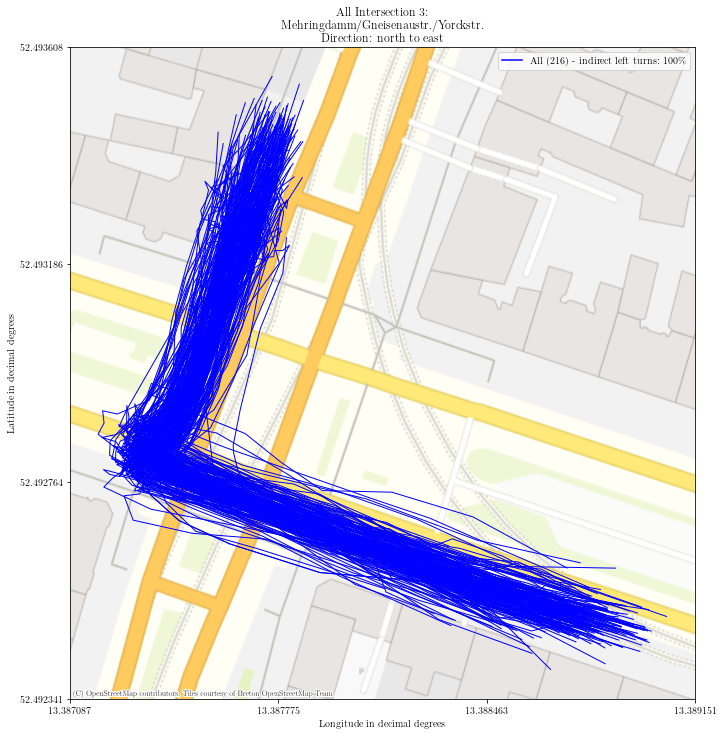

In [12]:
for idx, row in df.iloc[8:9,].iterrows():
# for idx, row in df.iterrows():
    print(f'start coords: {row.start_rect_coords} \nend coords: {row.end_rect_coords}')
    # print(row)
    #df.loc[idx,'fraction_cluster_1'], df.loc[idx,'rides'] = return_cluster_results_and_plot_path(row, figsize_rides = (12,12))
    return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group_name = "All", no_labels = True)          #37.81, 62.19
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 0, group_name = "Group_0")#0, 100
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 1, group_name = "Group_1")#13.73, 86.27
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 2, group_name = "Group_2")#60.53, 39.47
    print('\n')

start coords: (13.416169, 52.521508, 13.416513, 52.521832) 
end coords: (13.41591, 52.522275, 13.416421, 52.522569)


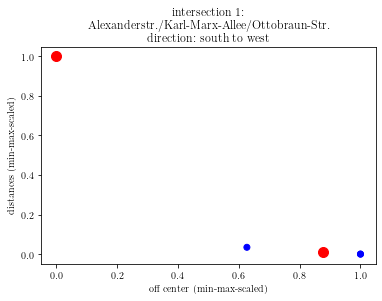

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


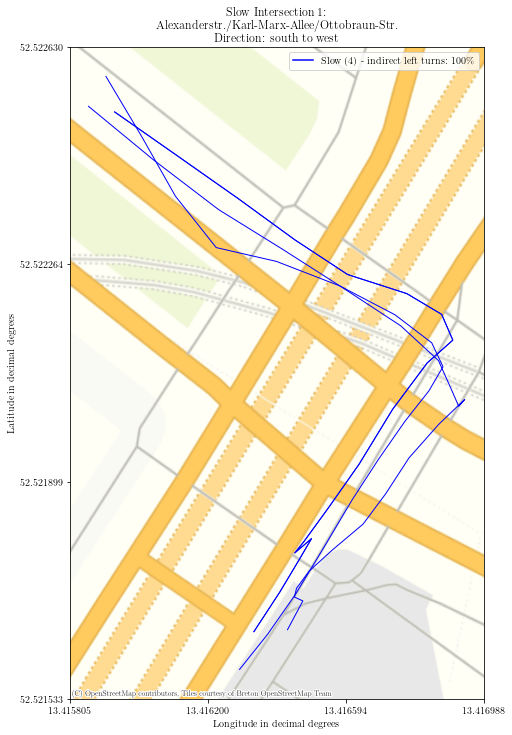

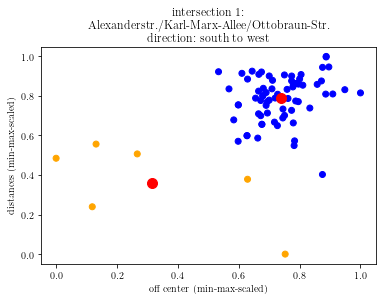

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


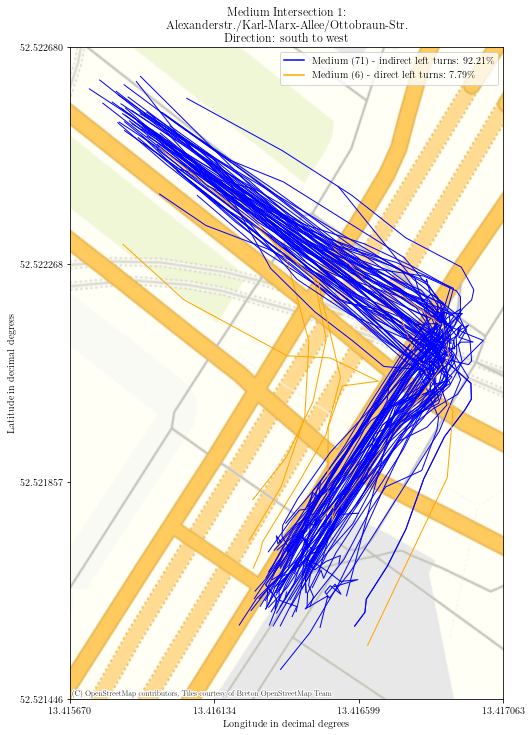

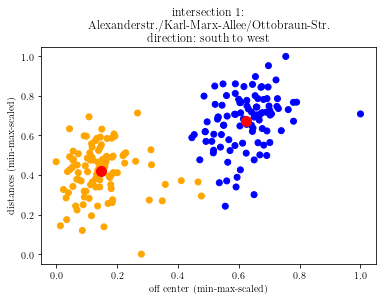

/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


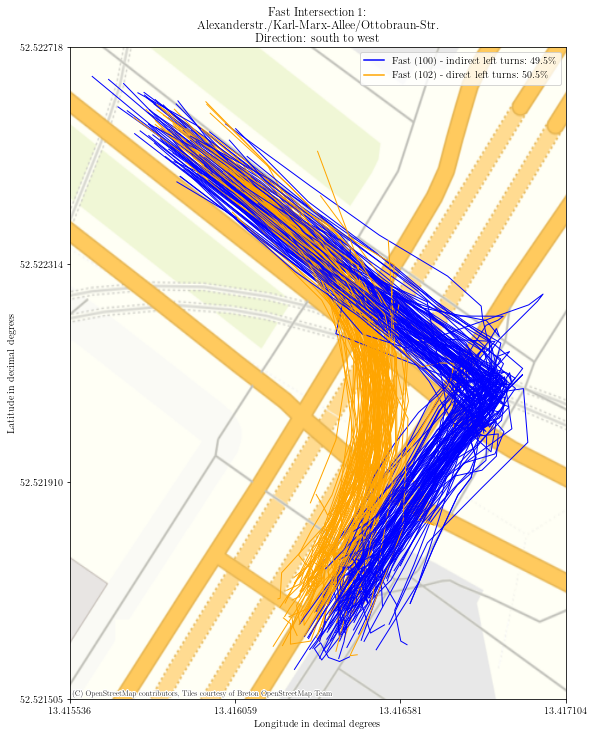

In [13]:
for idx, row in df.iloc[2:3,].iterrows():
# for idx, row in df.iterrows():
    print(f'start coords: {row.start_rect_coords} \nend coords: {row.end_rect_coords}')
    # print(row)
    #df.loc[idx,'fraction_cluster_1'], df.loc[idx,'rides'] = return_cluster_results_and_plot_path(row, figsize_rides = (12,12))
    # return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group_name = "No_group")          #37.81, 62.19
    return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 0, group_name = "Slow", no_labels = True)#0, 100
    return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 1, group_name = "Medium")#13.73, 86.27
    return_cluster_results_and_plot_path(row, figsize_rides = (12,12), group = 2, group_name = "Fast")#60.53, 39.47
    print('\n')

In [ ]:
# for i in range(len(df) - 12, len(df), 4): #len(df)
for i in range(0, 1, 1): #len(df)
    row = df.iloc[i:i+4,]
    return_cluster_results_and_plot_path_grouped(row, figsize_rides = (12,12), group_name = "No_group")
    return_cluster_results_and_plot_path_grouped(row, figsize_rides = (12,12), group = 0, group_name = "Group_0")#0, 100
    return_cluster_results_and_plot_path_grouped(row, figsize_rides = (12,12), group = 1, group_name = "Group_1")#13.73, 86.27
    return_cluster_results_and_plot_path_grouped(row, figsize_rides = (12,12), group = 2, group_name = "Group_2")#60.53, 39.47
    print('\n')

In [ ]:
# df

In [ ]:
# check from plots if:
# cluster_1_is_direct_turn: Is the first cluster the direct turn cluster?
# no_direct_present: Are no direct turns present?
# not_identifiable: Did the clustering fail or is no data available?


name = "Alexanderstr./Karl-Marx-Allee/Ottobraun-Str."

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = False


name = "Leibnizstr./Bismarckstr."

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = True

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = True

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = True


name = "Mehringdamm/Gneisenaustr./Yorckstr."

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] =  False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = True

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = False 
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = False


name = "Petersburger Str./Frankfurter Allee/Warschauer Str./Karl-Marx-Allee"

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = False


name = "Potsdamer Str./Goebenstr./Pallasstr."

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = True

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = False


name = "Warschauer Str./Stralauer Allee/Oberbaumbruecke/Muehlenstr."

df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'north to east'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'no_direct_present'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'east to south'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'south to west'), 'not_identifiable'] = False

df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'cluster_1_is_direct_turn'] = False
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'no_direct_present'] = True
df.loc[(df['name'] == name) & (df['direction'] == 'west to north'), 'not_identifiable'] = False


In [ ]:
# df[['name', 'direction', 'lanes in', 'lanes out', 'rides', '']]

In [ ]:
df.columns

In [ ]:
def calc_lanes_intersection(df) -> None:
    intersection_lanes = df.groupby('intersection number').agg({'lanes in': sum, 'lanes out': sum}).sum(axis=1)
    for idx, row in df.iterrows():
        df.loc[idx,'lanes intersection'] = int(intersection_lanes[row['intersection number']])

In [ ]:
def deduce_share_direct_turn(df: pd.DataFrame, verbose=False) -> None:
    for i, row in df.iterrows():
        number = row['intersection number']
        if df.loc[i,'not_identifiable']:
            df.loc[i,'share direct turn'] = np.nan
            if verbose:
                print(f'Intersection {number}: {row.name} - {row.direction}')
                print(f'    Set share of direct turn to Nan because it is not identifiable.')
        elif df.loc[i,'no_direct_present']:
            df.loc[i,'share direct turn'] = 0
            if verbose:
                print(f'Intersection {number}: {row.name} - {row.direction}')
                print(f'    Set share of direct turn to 0, because no direct turn is present.')
        elif df.loc[i,'share direct turn'] and df.loc[i,'cluster_1_is_direct_turn']:
            if verbose:
                print(f'Intersection {number}: {row.name} - {row.direction}')
                print(f'    Set share of direct turn to "cluster 1 share".')
            df.loc[i,'share direct turn'] = df.loc[i,'fraction_cluster_1']
        else:
            df.loc[i,'share direct turn'] = 1 - df.loc[i,'fraction_cluster_1']
            if verbose:
                print(f'Intersection {number}: {row.name} - {row.direction}')
                print(f'    Set share of direct turn to "1 - cluster 1 share".')

In [ ]:
deduce_share_direct_turn(df, verbose = False)
calc_lanes_intersection(df)

In [ ]:
df

In [ ]:
df['share direct turn'] = round(df['share direct turn'],2)

In [ ]:
print(df.loc[:,['intersection number','direction','rides','lanes in', 'lanes out','lanes intersection','share direct turn']].\
    to_latex(caption='Results of k-means clustering after post-processing.', label='tab:results_k-means', index = False,\
        float_format="%.2f"))

In [ ]:
df.columns

In [ ]:
plt.hist(df['share direct turn'],bins = 10)
plt.xlabel('share direct turn')
plt.savefig(f'images/hist_share_direct_turn.png', transparent=True, bbox_inches='tight')

In [ ]:
mean = df['share direct turn'].mean()
print(f'Mean "share direct turn": {round(mean,4)}')

#### Logistic regression (input & output lanes as features)

In [ ]:
x1 = df['lanes in'].to_numpy(dtype='float')
x2 = df['lanes out'].to_numpy(dtype='float')
X_0 = np.vstack((x1,x2)).T
Y_0 = df['share direct turn'].to_numpy()
weights = df['rides'].to_numpy(dtype='int')

In [ ]:
# remove nans
mask = df['share direct turn'].isna()
X_0 = X_0[~mask,:]
Y_0 = Y_0[~mask]
weights = weights[~mask]

In [ ]:
Y_0

Create n=100 samples for each intersection according to direct turn ratio.

Example for one intersection:
* lanes in = 2
* lanes out = 3
* share direct turn = 0.2

20 * [2,3] [1]

80 * [2,3] [0]

In [ ]:
# create noise for plot
noise = np.random.uniform(0,0.05,Y_0.shape)

In [ ]:
plt.scatter(X_0[:,0], Y_0 + noise, marker='x')
plt.xlabel('n lanes in')
plt.ylabel('share direkt turn')

In [ ]:
plt.scatter(X_0[:,1], Y_0, marker='x')
plt.xlabel('n lanes out')
plt.ylabel('share direkt turn')

In [ ]:
n=100
Y_0_scaled = (Y_0*n).astype(int)

In [ ]:
Y_0_scaled

In [ ]:
#weighted equally per intersection/turn
X1 = np.repeat(X_0,Y_0_scaled, axis = 0)
X2 = np.repeat(X_0,(n-Y_0_scaled), axis = 0)
Y1 = np.ones((X1.shape[0],1),dtype='int')
Y2 = np.zeros((X2.shape[0],1),dtype='int')
X = np.vstack((X1,X2))
Y = np.ravel(np.vstack((Y1,Y2)))

In [ ]:
X1.shape

In [ ]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(1, 5, 25)  
y_pred = np.linspace(1, 5, 25) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

model_viz.shape

In [ ]:
logreg = LogisticRegression()
model = logreg.fit(X, Y)

predicted = np.ravel(model.predict_proba(model_viz)[:,1])


predict_prob_direct = model.predict_proba(X_0)[:,1]
predict_prob_direct

In [ ]:
r2 = model.score(X, Y)

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(X_0[:,0], X_0[:,1], Y_0, color='k',linestyle='none', marker='x', alpha=0.8, label = 'visualization samples')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=2, edgecolor='#70b3f0', label = 'predicted probabilites')
    ax.set_xlabel('n input lanes', fontsize=12)
    ax.set_ylabel('n output lanes', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=15, azim=45)
ax2.view_init(elev=5, azim=0)
ax3.view_init(elev=30, azim=130)

plt.legend()
fig.tight_layout()

In [ ]:
# for i,j,k in zip(X_0[:,0],X_0[:,1],predict_prob_direct):
#     print(i,j,round(k,2))

In [ ]:
plt.scatter(X_0[:,0],predict_prob_direct,s=7)
plt.xlabel('lanes in')
plt.ylabel('predicted probability direct turn')

In [ ]:
plt.scatter(X_0[:,1],predict_prob_direct,s=7)
plt.xlabel('lanes out')
plt.ylabel('predicted probability direct turn')

In [ ]:
display(model.intercept_)
display(model.coef_)